# EDA

### Import Libraries

In [1]:
import pandas as pd
import csv
import os
import numpy as np
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import time

### Set filepaths

In [4]:
raw_data_directory = os.path.join('..', 'data', 'raw')
interim_data_directory = os.path.join('..', 'data', 'interim')

review_filepath = os.path.join(raw_data_directory, 
                                   'yelp_academic_dataset_review.csv')
business_filepath = os.path.join(raw_data_directory, 
                                   'yelp_academic_dataset_business.csv')
restaurant_review_filepath = os.path.join(interim_data_directory, 
                                   'restaurant_review.csv')

### Load Data

In [39]:
review_df = pd.read_csv('../data/interim/restaurant_review.csv')

In [20]:
restaurant_df = pd.read_csv('../data/interim/restaurant.csv')

In [21]:
restaurant_df.columns

Index(['name', 'business_id', 'stars', 'review_count', 'categories',
       'longitude', 'latitude', 'postal_code', 'city', 'state'],
      dtype='object')

In [22]:
restaurant_df.head()

,name,business_id,stars,review_count,categories,longitude,latitude,postal_code,city,state
0,Minhas Micro Brewery,Apn5Q_b6Nz61Tq4XzPdf9A,4.0,24,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",-114.031675,51.091813,T2E 6L6,Calgary,AB
1,CK'S BBQ & Catering,AjEbIBw6ZFfln7ePHha9PA,4.5,3,"Chicken Wings, Burgers, Caterers, Street Vendo...",-114.939821,35.960734,89002,Henderson,NV
2,La Bastringue,O8S5hYJ1SMc8fA4QBtVujA,4.0,5,"Breakfast & Brunch, Restaurants, French, Sandw...",-73.599300,45.540503,H2G 1K7,Montréal,QC
3,Thai One On,6OuOZAok8ikONMS_T3EzXg,2.0,7,"Restaurants, Thai",-79.632763,43.712946,L4T 1A8,Mississauga,ON
4,Filiberto's Mexican Food,8-NRKkPY1UiFXW20WXKiXg,2.5,40,"Mexican, Restaurants",-112.341302,33.448106,85323,Avondale,AZ


In [41]:
restaurant_df.shape

(57074, 10)

### Observe the most reviewed restaurants

In [25]:
restaurant_df.nlargest(5, 'review_count')

,name,business_id,stars,review_count,categories,longitude,latitude,postal_code,city,state
42044,Mon Ami Gabi,4JNXUYY8wbaaDmk3BPzlWw,4.0,7968,"Steakhouses, Breakfast & Brunch, Restaurants, ...",-115.172581,36.112827,89109,Las Vegas,NV
56089,Bacchanal Buffet,RESDUcs7fIiihp38-d6_6g,4.0,7866,"Sandwiches, Buffets, Breakfast & Brunch, Food,...",-115.176222,36.116113,89109,Las Vegas,NV
19340,Wicked Spoon,K7lWdNUhCbcnEvI0NhGewg,3.5,6446,"Buffets, Restaurants, Breakfast & Brunch",-115.176155,36.109550,89109,Las Vegas,NV
56981,Gordon Ramsay BurGR,cYwJA2A6I12KNkm2rtXd5g,4.0,5472,"Burgers, American (Traditional), Restaurants",-115.172169,36.110724,89109,Las Vegas,NV
51619,Hash House A Go Go,f4x1YBxkLrZg652xt2KR5g,4.0,5382,"Breakfast & Brunch, American (New), Restaurants",-115.171580,36.118181,89109,Las Vegas,NV


### Observe the best and worst restaurants with over 1000 reviews

Highest Rated:

In [27]:
restaurant_df[restaurant_df['review_count'] >= 1000].sort_values(by = 'stars', ascending = False).head()

,name,business_id,stars,review_count,categories,longitude,latitude,postal_code,city,state
39406,Brew Tea Bar,IhNASEZ3XnBHmuuVnWdIwA,5.0,1380,"Cafes, Desserts, Tea Rooms, Bubble Tea, Food, ...",-115.242443,36.054195,89139,Las Vegas,NV
9589,Little Miss BBQ,Xg5qEQiB-7L6kGJ5F4K3bQ,5.0,1746,"Barbeque, Restaurants",-111.989344,33.421877,85034,Phoenix,AZ
12842,Hwaro,GmdujALb1Nq2RHGr7jhCaA,4.5,1217,"Buffets, Barbeque, Restaurants, Korean",-115.209860,36.127031,89146,Spring Valley,NV
51419,Carson Kitchen,2iTsRqUsPGRH1li1WVRvKQ,4.5,1819,"American (New), Restaurants, Salad, Burgers, F...",-115.140640,36.167878,89101,Las Vegas,NV
17014,Juan's Flaming Fajitas & Cantina,SVGApDPNdpFlEjwRQThCxA,4.5,1479,"Restaurants, Bars, Nightlife, Mexican",-115.302689,36.100509,89147,Las Vegas,NV


Lowest Rated:

In [26]:
restaurant_df[restaurant_df['review_count'] >= 1000].sort_values(by = 'stars').head()

,name,business_id,stars,review_count,categories,longitude,latitude,postal_code,city,state
56805,Hakkasan Nightclub,X8c23dur0ll2D9XTu-I8Qg,2.5,1720,"Restaurants, Bars, Nightlife, Chinese, Dance C...",-115.172452,36.101375,89109,Las Vegas,NV
32302,MGM Grand Buffet,-U7tvCtaraTQ9b0zBhpBMA,2.5,1096,"Restaurants, Buffets, American (Traditional)",-115.171778,36.102091,89109,Las Vegas,NV
26080,Hooters Casino Hotel Las Vegas,4GXII-GU7S0ZyU6ElkhscQ,2.5,1432,"American (Traditional), Restaurants, Casinos, ...",-115.167874,36.099346,89109,Las Vegas,NV
43087,MGM Grand Hotel,El4FC8jcawUVgw_0EIcbaQ,3.0,3730,"Arts & Entertainment, Hotels & Travel, Event P...",-115.169968,36.102251,89109,Las Vegas,NV
52616,Bayside Buffet at Mandalay Bay,PgJgpW4TKQ8IoALH2Yq-zA,3.0,1117,"Restaurants, Buffets, American (Traditional), ...",-115.175804,36.091219,89109,Las Vegas,NV


### Observe distributions of restaurant data

In [31]:
n_popular_restaurants = len(restaurant_df[restaurant_df['review_count'] >= 1000])
print(f'Number of restaurants with 1000 or more reviews: {n_popular_restaurants}')


Number of restaurants with 1000 or more reviews: 249


In [37]:
n_unpopular_restaurants = len(restaurant_df[restaurant_df['review_count'] <= 50])
print(f'Number of restaurants with 50 or less reviews: {n_unpopular_restaurants}')


Number of restaurants with 50 or less reviews: 41044


Only 249 restaurants out of 57074 restaurants have over 1000 reviews. 41044 restaurants have 50 or less. This will make analysis on most restaurants with few reviews (`n < 100`) unreliable. Unpopular food items in most restaurants may have few reviews, if any, to analyze. Having such a low sample size will likely produce unreliable results.


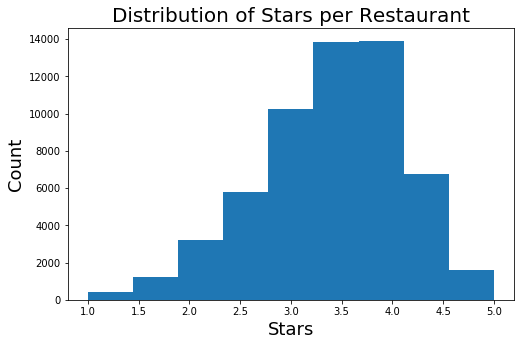

In [33]:
plt.figure(figsize = (8,5))
plt.title('Distribution of Stars per Restaurant', fontsize = 20)
plt.xlabel('Stars', fontsize = 18)
plt.ylabel('Count', fontsize = 18)

plt.hist(restaurant_df['stars'], bins = 9);

The distribution of star ratings has a fairly normal distribution with a slight left skew. There are 9 discrete bins because Yelp's rating system is rounded to the nearest 0.5 inteval between `[1.0, 5.0]`.

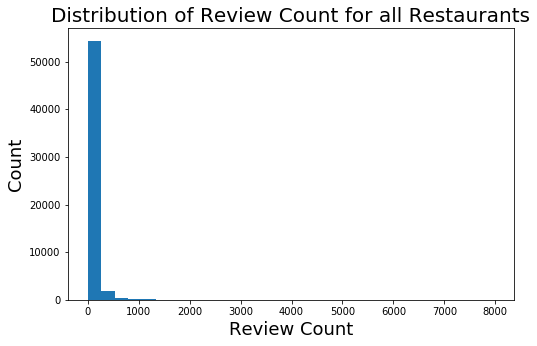

In [34]:
plt.figure(figsize = (8,5))
plt.title('Distribution of Review Count for all Restaurants', fontsize = 20)
plt.xlabel('Review Count', fontsize = 18)
plt.ylabel('Count', fontsize = 18)

plt.hist(restaurant_df['review_count'], bins = 30);

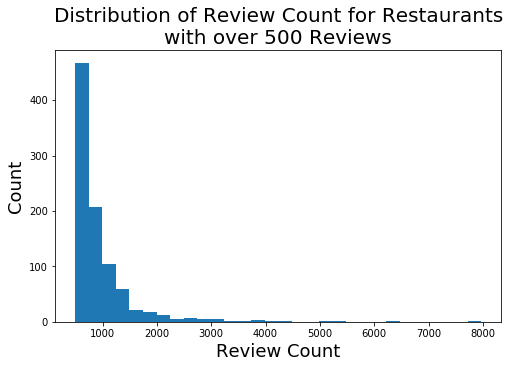

In [35]:
plt.figure(figsize = (8,5))
plt.title('Distribution of Review Count for Restaurants\nwith over 500 Reviews', fontsize = 20)
plt.xlabel('Review Count', fontsize = 18)
plt.ylabel('Count', fontsize = 18)

plt.hist(restaurant_df[restaurant_df['review_count'] >= 500]['review_count'], bins = 30);


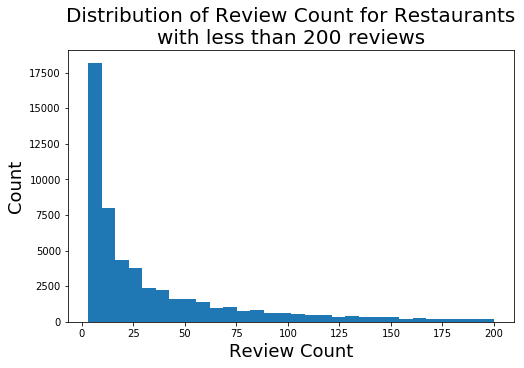

In [36]:
plt.figure(figsize = (8,5))
plt.title('Distribution of Review Count for Restaurants\nwith less than 200 reviews', fontsize = 20)
plt.xlabel('Review Count', fontsize = 18)
plt.ylabel('Count', fontsize = 18)

plt.hist(restaurant_df[restaurant_df['review_count'] <= 200]['review_count'], bins = 30);


The distribution of review counts is heavily right-skewed. Most restaurants have 100 or less reviews, while only a few have thousands of reviews. 



In [45]:
def summarize_business(business_df, review_df, query, by = 'business_id'):
    '''
    Print a summary of a business:
    Name, Stars, Number of reviews, Reviews per star, Histogram of stars
    '''
    business = business_df[business_df['business_id'] == query]
    business_name = business['name'].values[0]
    
#     business_name = review_df[review_df['business_id'] == query]['business_name'].values[0]
    reviews_per_star = review_df[review_df['business_id'] == query]['stars'].value_counts()
    
    # Business Name
    print('Business Name:', business_name)
    
    # Stars
    print('Stars:', business['stars'].values[0])
    print('')
    
    # Total number of reviews
    print('Total Number of Reviews:', len(review_df[review_df['business_id'] == query]))
    print('')
    
    # Number of reviews per star rating
    print('Number of reviews per star:')
    for stars, count in reviews_per_star.items():
        print(stars,'\t',count)
    print('')
    
    # Histogram of reviews per star rating
    plt.figure(figsize = (8,5))
    plt.title('Distribution of Reviews per Star', fontsize = 20)
    plt.xlabel('Stars', fontsize = 18)
    plt.ylabel('Review Count', fontsize = 18)

    plt.bar(reviews_per_star.index, reviews_per_star.values)
    plt.show()


Business Name: Mon Ami Gabi
Stars: 4.0

Total Number of Reviews: 7968

Number of reviews per star:
5 	 3599
4 	 2743
3 	 914
2 	 441
1 	 271



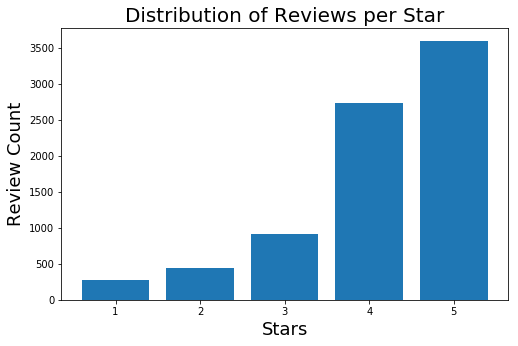

In [61]:
mon_ami_gabi_id = '4JNXUYY8wbaaDmk3BPzlWw' 
summarize_business(business_df, restaurant_df, mon_ami_gabi_id, by = 'business_id')


Business Name: Hakkasan Nightclub
Stars: 2.5

Total Number of Reviews: 1721

Number of reviews per star:
1 	 647
3 	 290
4 	 275
2 	 262
5 	 247



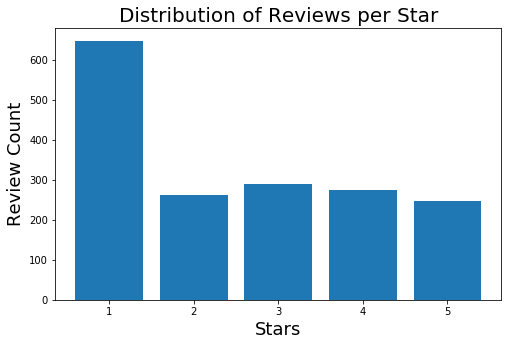

In [64]:
hakkasan_id = 'X8c23dur0ll2D9XTu-I8Qg' 
summarize_business(business_df, restaurant_df, hakkasan_id, by = 'business_id')



Restaurants with low star ratings seem to have a high concentration of 1-star reviews.

### Observe how Vader's analyzer works

In [3]:
def get_sentiments(docs):
    '''
    Returns a Dataframe of sentiment scores with columns:
    'compound', 'pos', 'neu', 'neg'
    
    For each doc, 'pos', 'neu', 'neg' scores add to 1.
    'compound' is an overall sentiment score of the doc.
    '''
    # Instantiate SentimentIntensityAnalyzer
    sia = SentimentIntensityAnalyzer()

    sentiments = []

    # Generate sentiment score for each review
    for doc in docs:
        sentiment = sia.polarity_scores(doc)
        sentiments.append(sentiment)

    return pd.DataFrame(sentiments)

In [22]:
words = ['great', 'delicious', 'amazing', 'good', 'okay', 'decent', 'mediocre', 'bad', 'awful', 'disgusting', 'to die for', 'the bomb']
words = pd.Series(words, name = 'word')
pd.concat([words, get_sentiments(words)['compound']], axis = 1).sort_values(by = 'compound', ascending = False)

,word,compound
0,great,0.6249
2,amazing,0.5859
1,delicious,0.5719
3,good,0.4404
4,okay,0.2263
5,decent,0.0000
6,mediocre,0.0000
8,awful,-0.4588
11,the bomb,-0.4939
9,disgusting,-0.5267
